## 영화데이터를 활용한 관객수 분석

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. 라이브러리 및 데이터 

In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import pandas as pd #판다스 패키지 불러오기

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [4]:
#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 

#seaborn 라이브러리를 이용한 시각화
import seaborn as sns

In [5]:
# 데이터 불러오기
# 모델 학습 파일
train = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/06/영화데이터/data/movies_train.csv') 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


+ title : 영화제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat: 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 영화감독이 참여했던 영화 평균관객수
+ dir_prev_num :영화감독이 참여했던 영화수
+ num_staff :스텝수
+ num_actor :주연배우수 
+ box_off_num : 관객수    

## 2. 탐색적 자료분석 ( Exploratory Data Analysis : EDA)

#### 전체 자료 확인
+ pd.options.display.float_format = '{:.1f}'.format
+ pd.reset_option('display.float_format')

In [7]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [8]:
#평균 통계값 
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [13]:
#판다스 수치 표현 변경
pd.options.display.float_format = '{:.1f}'.format

In [11]:
pd.reset_option('display.float_format')

In [14]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
#상관계수
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


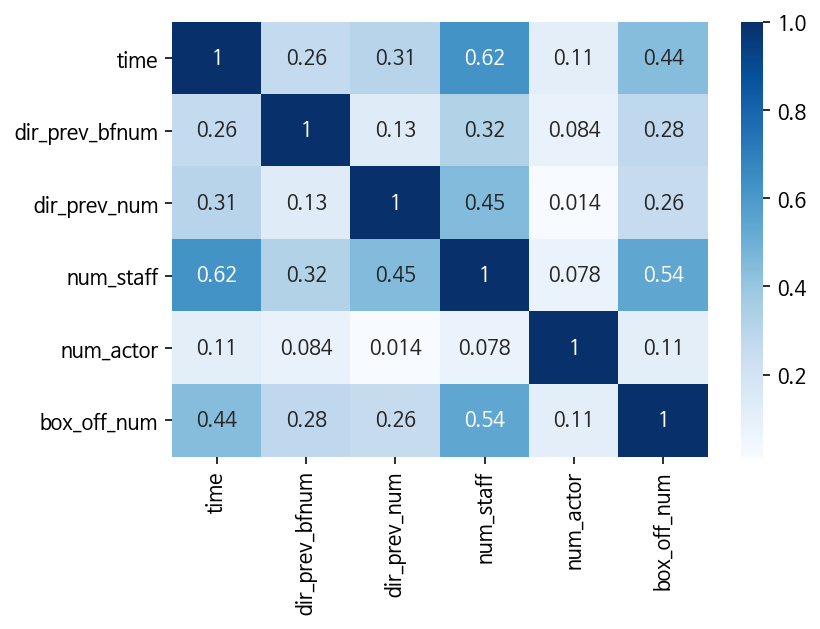

In [ ]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

####장르별 
+ 영화 관람 평균 그래프를 그리시오.

In [10]:
dfg = train.groupby('genre')['box_off_num'].mean().sort_values()
print(type(dfg))
print(dfg)

<class 'pandas.core.series.Series'>
genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64


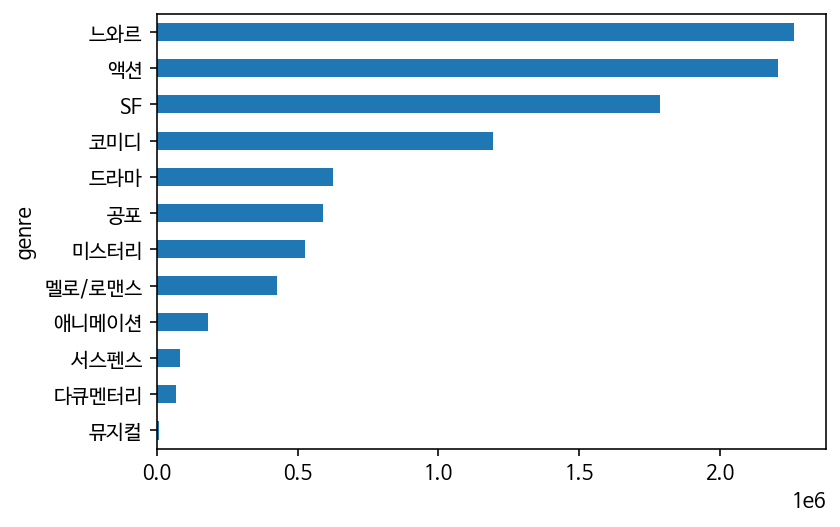

In [11]:
dfg.plot(kind='barh')
plt.show()

####상영등급 
+ 상영 등급별 영화관람평균 그래프를 그리시오.

In [ ]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
dfg = train.groupby('screening_rat')['box_off_num'].mean().sort_values()

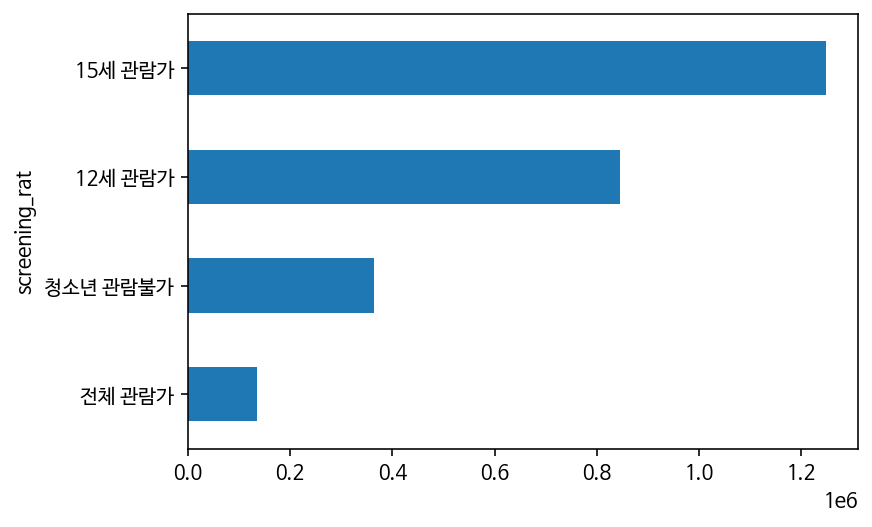

In [ ]:
dfg.plot(kind='barh')

#### 영화 배급사를 영화수를 이용하여 1~5등급으로 분류하여 새로운 데이터프레임 생성
+ 영화사 등급 열 dgrade을 추가 
+ 영화사 등급별 제작 장르에 대한 그래프를 그리시오. 

+ 영화사 등급별 관객수 평균 그래프를 그리시오.


In [23]:
#영화 배급사 : 169
df_title = train['distributor'].value_counts() 
df_title

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
인디스토리        26
             ..
영화사 조아        1
콘텐츠판다         1
나우콘텐츠         1
프로젝트 엠피       1
전주국제영화제       1
Name: distributor, Length: 169, dtype: int64

In [24]:
df_title = pd.DataFrame(df_title)
df_title 

,distributor
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
인디스토리,26
...,...
영화사 조아,1
콘텐츠판다,1
나우콘텐츠,1
프로젝트 엠피,1


In [28]:
df_title['distributor'].value_counts().sort_index()

1     102
2      20
3      14
4       6
5       2
6       6
7       1
8       3
9       1
10      6
14      1
15      1
26      2
29      1
30      1
52      1
54      1
Name: distributor, dtype: int64

In [29]:
df_title['dgrade'] = pd.cut(df_title['distributor'], 5)

In [30]:
df_title['dgrade']

CJ 엔터테인먼트     (43.4, 54.0]
롯데엔터테인먼트      (43.4, 54.0]
(주)NEW        (22.2, 32.8]
(주)마운틴픽쳐스     (22.2, 32.8]
인디스토리         (22.2, 32.8]
                 ...      
영화사 조아       (0.947, 11.6]
콘텐츠판다        (0.947, 11.6]
나우콘텐츠        (0.947, 11.6]
프로젝트 엠피      (0.947, 11.6]
전주국제영화제      (0.947, 11.6]
Name: dgrade, Length: 169, dtype: category
Categories (5, interval[float64]): [(0.947, 11.6] < (11.6, 22.2] < (22.2, 32.8] < (32.8, 43.4] <
                                    (43.4, 54.0]]

In [31]:
df_title['dgrade'] = pd.cut(df_title['distributor'], 5, labels=False)

In [32]:
df_title

,distributor,dgrade
CJ 엔터테인먼트,54,4
롯데엔터테인먼트,52,4
(주)NEW,30,2
(주)마운틴픽쳐스,29,2
인디스토리,26,2
...,...,...
영화사 조아,1,0
콘텐츠판다,1,0
나우콘텐츠,1,0
프로젝트 엠피,1,0


In [33]:
df_title = df_title.reset_index().drop('distributor', axis = 1)
df_title['dgrade'] = df_title['dgrade'] + 1
df_title

,index,dgrade
0,CJ 엔터테인먼트,5
1,롯데엔터테인먼트,5
2,(주)NEW,3
3,(주)마운틴픽쳐스,3
4,인디스토리,3
...,...,...
164,영화사 조아,1
165,콘텐츠판다,1
166,나우콘텐츠,1
167,프로젝트 엠피,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [37]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  169 non-null    object
 1   dgrade       169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [36]:
df_title = df_title.rename(columns={'index':'distributor'})
df_title

,distributor,dgrade
0,CJ 엔터테인먼트,5
1,롯데엔터테인먼트,5
2,(주)NEW,3
3,(주)마운틴픽쳐스,3
4,인디스토리,3
...,...,...
164,영화사 조아,1
165,콘텐츠판다,1
166,나우콘텐츠,1
167,프로젝트 엠피,1


In [39]:
df = train.merge(df_title, on='distributor')
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dgrade
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,5
1,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,5
2,관능의 법칙,롯데엔터테인먼트,드라마,2014-02-13,108,청소년 관람불가,권칠인,75740.0,1,288,3,781516,5
3,끝과 시작,롯데엔터테인먼트,멜로/로맨스,2013-04-04,87,청소년 관람불가,민규동,4598985.0,1,182,3,38809,5
4,친구 2,롯데엔터테인먼트,느와르,2013-11-14,124,청소년 관람불가,곽경택,372863.0,2,319,3,2971475,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,네모난원,영화사 廊,드라마,2012-12-06,100,15세 관람가,김성훈,86837.0,2,10,3,7173,1
596,사랑을 말하다,크리에이티브컴즈(주),드라마,2012-09-13,61,15세 관람가,전화성,424.0,2,6,8,188,1
597,분홍돌고래,ysfilm,드라마,2010-07-01,78,12세 관람가,조연수,NaN,0,17,7,172,1
598,"메밀꽃, 운수 좋은 날, 그리고 봄봄",이달투,애니메이션,2014-08-21,90,전체 관람가,안재훈,53235.0,1,167,7,35567,1


In [40]:
dfg = df.groupby('dgrade')['box_off_num'].mean()
dfg = pd.DataFrame(dfg)
dfg

,box_off_num
dgrade,
1,2.514085e+05
2,2.757931e+03
3,1.393321e+06
5,1.709168e+06


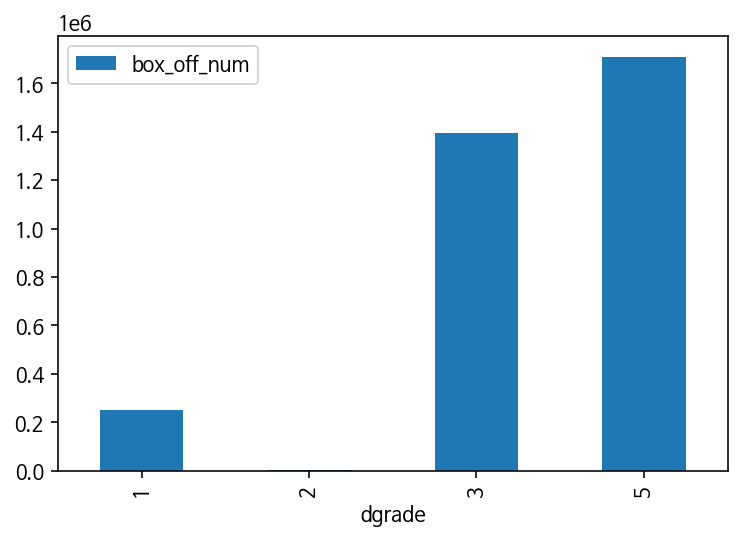

In [41]:
dfg.plot(kind='bar')

In [ ]:
dfg = df.groupby(['dgrade','genre'])['box_off_num'].mean()
dfg = dfg.unstack()
dfg

genre,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
dgrade,,,,,,,,,,,,
1,3.783712e+05,3.345856e+05,4.770566e+05,77578.794521,1.940626e+05,1.610897e+05,6263.0,3.877914e+05,82611.0,61648.75,6.721999e+05,7.953111e+05
2,NaN,1.617000e+03,NaN,16968.333333,1.059167e+03,7.474286e+02,8083.0,1.113500e+03,NaN,NaN,2.570000e+02,7.200000e+01
3,7.108970e+05,1.191775e+06,4.362500e+06,32768.500000,9.579920e+05,8.215340e+05,NaN,3.861000e+03,NaN,229741.50,3.586112e+06,2.689844e+06
5,4.711394e+06,8.756950e+05,1.817743e+06,8567.000000,1.977679e+06,1.325437e+06,NaN,1.040638e+06,NaN,374456.00,2.922236e+06,1.461424e+06


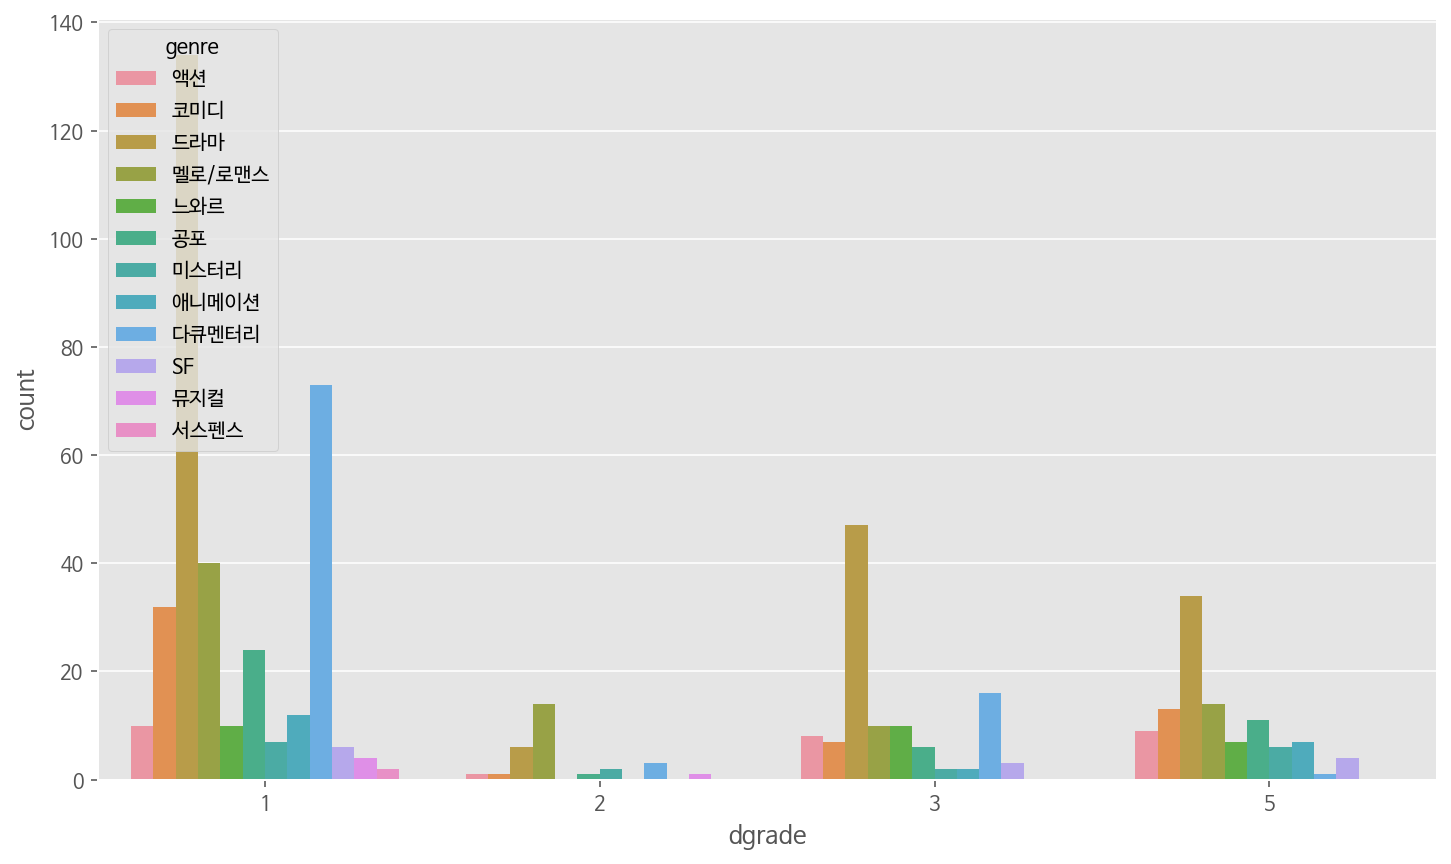

In [ ]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.countplot('dgrade',hue='genre', data=df)

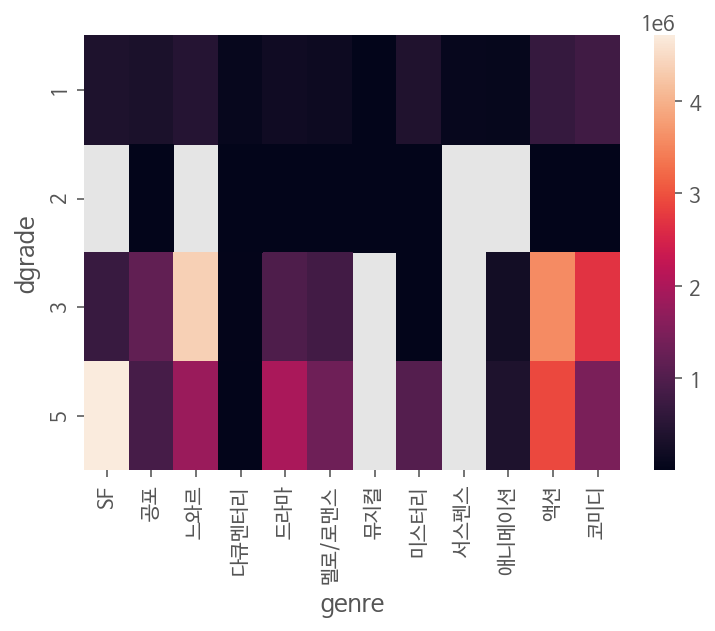

In [ ]:
sns.heatmap(dfg)

## 3. 데이터 전처리( Data Cleansing & Pre-Processing )

#### 결측값 확인

In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
train[train['dir_prev_bfnum'].isna()][['dir_prev_bfnum','dir_prev_num']]

,dir_prev_bfnum,dir_prev_num
0,NaN,0
6,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
...,...,...
593,NaN,0
594,NaN,0
597,NaN,0
598,NaN,0


In [ ]:
train[train['dir_prev_bfnum'].isna()][['dir_prev_num']].sum()

dir_prev_num    0
dtype: int64

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
train['dir_prev_bfnum'].isna().sum()

0